#Identity Recognition Demo. 
An attempt to recognize a person underneath a face mask. 
This project is trained on a single team member (Hieu) as if a system is using his biometrics for login. *Therefore it is meant to only recognize one person at a time.* However you can modify and play around with the code

__The main focus on this project is try to recognize the person underneath a mask__. We have trained a full face model on one of our team members (Hieu) for traditional whole face recognition *however there are more accurate algorithms out there that you can use for traditional face recognition*
- The notebook will output a probability of a person once finished running


This folder contains a couple images that you can use:
- hieumask.jpg
- deanmask.jpg
- madmask.jpg
- hewanmask.jpg

You can modify the filepaths below to change it or even upload your own photos to the folder to test. **This project also assumes that you've uploaded this demo onto the top root level of Google Drive; It's meant to be ran under Colaboratory**
- When using with Colaboratory, please enable GPU

# Intial Setup

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#Describe input. You will also need to upload the testImage
inputImagePath = ""
decision = 1
if(decision == 0):
  inputImagePath = "/content/drive/MyDrive/IdentityRecognitionDemov5/hieumask.jpg"
  #inputImagePath = "/content/drive/MyDrive/IdentityRecognitionTestFiles/testImage6.jpg"
if(decision == 1):
  inputImagePath = "/content/drive/MyDrive/IdentityRecognitionDemov5/deanmask.jpg"
if(decision == 2):
  inputImagePath = "/content/drive/MyDrive/IdentityRecognitionDemov5/madmask.jpg"
if(decision == 3):
  inputImagePath = "/content/drive/MyDrive/IdentityRecognitionDemov5/hewanmask.jpg"

In [ ]:
print(inputImagePath)

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git 
%cd yolov5/
!pip install -r requirements.txt >/dev/null

In [51]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import math, decimal, copy, glob
#from PIL import Image as im
import torch
import glob
from IPython.display import Image, display
import pandas as pd
import json

# Is there a mask?

In [52]:
!python detect.py --source {inputImagePath} --weights /content/drive/MyDrive/IdentityRecognitionDemov5/maskweight.pt --img 416 --save-txt --save-conf
maskExists = False
maskExistsConfidence = float(0)
labelDetected = 0

detect: weights=['/content/drive/MyDrive/IdentityRecognitionDemov5/maskweight.pt'], source=/content/drive/MyDrive/IdentityRecognitionDemov5/deanmask.jpg, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-122-gd885799 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/IdentityRecognitionDemov5/deanmask.jpg: 256x416 1 mask, Done. (0.014s)
Speed: 0.7ms pre-process, 14.0ms inference, 1.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels


There's a mask!


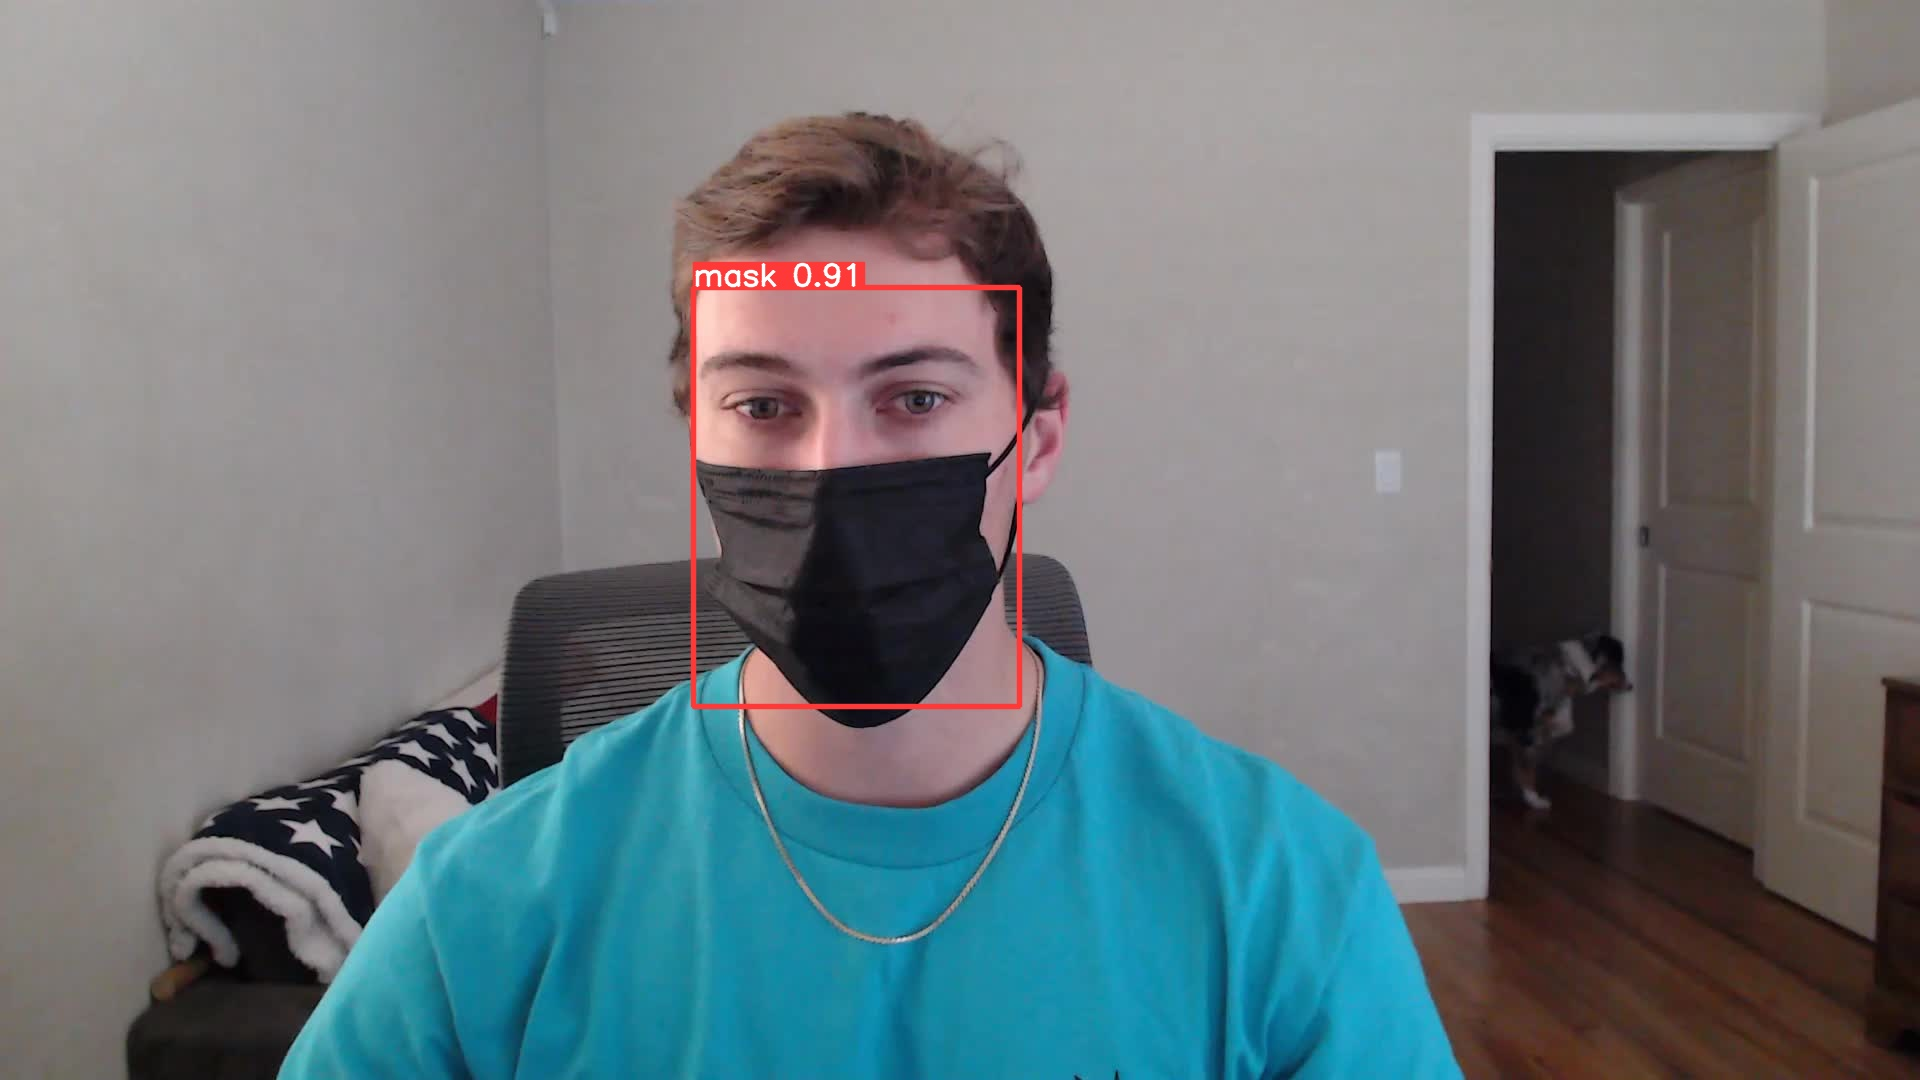

In [53]:
labelPath = os.listdir("/content/yolov5/runs/detect/exp/labels")
labelPath = labelPath[0]

with open("/content/yolov5/runs/detect/exp/labels/" + labelPath) as f:
  lines = f.read()
  maskConfidence = lines.split()
  maskExistsConfidence = float(maskConfidence[5])
  labelDetected = int(maskConfidence[0])

if(labelDetected == 0):
  print("There's a mask!")
  maskExists = True
else:
  print("There's no mask!")

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assume JPG file
    display(Image(filename=imageName))
    #print("\n")

## If there's a mask...

#### Confidence from half face

In [54]:
def detectHalfFace():
  halfFaceWeightPath = "/content/drive/MyDrive/IdentityRecognitionDemov5/tophalffaceweight.pt"
  trainedHalfFaceModel = torch.hub.load('/content/yolov5', 'custom', path=halfFaceWeightPath, source='local')  # local repo
  halfFaceResults = trainedHalfFaceModel(inputImagePath)
  halfFaceResults.save()

  for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #assume JPG file
    display(Image(filename=imageName))
    #print("\n")

  halfFaceResultsJSON = json.loads(halfFaceResults.pandas().xyxy[0].to_json(orient="records") )
  return float(halfFaceResultsJSON[0]['confidence'])

#### Confidence from eye area

In [55]:
def detectEyeArea():
  eyeAreaWeightPath = "/content/drive/MyDrive/IdentityRecognitionDemov5/eyeareaweight.pt"
  trainedEyeAreaModel = torch.hub.load('/content/yolov5', 'custom', path=eyeAreaWeightPath, source='local')  # local repo
  eyeAreaResults = trainedEyeAreaModel(inputImagePath)
  eyeAreaResults.save()

  for imageName in glob.glob('/content/yolov5/runs/detect/exp3/*.jpg'): #assume JPG file
    display(Image(filename=imageName))
    #print("\n")

  eyeAreaResultsJSON = json.loads(eyeAreaResults.pandas().xyxy[0].to_json(orient="records") )
  return float(eyeAreaResultsJSON[0]['confidence'])

# Confidence probability

requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 v6.0-122-gd885799 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)




requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Saved 1 image to runs/detect/exp2


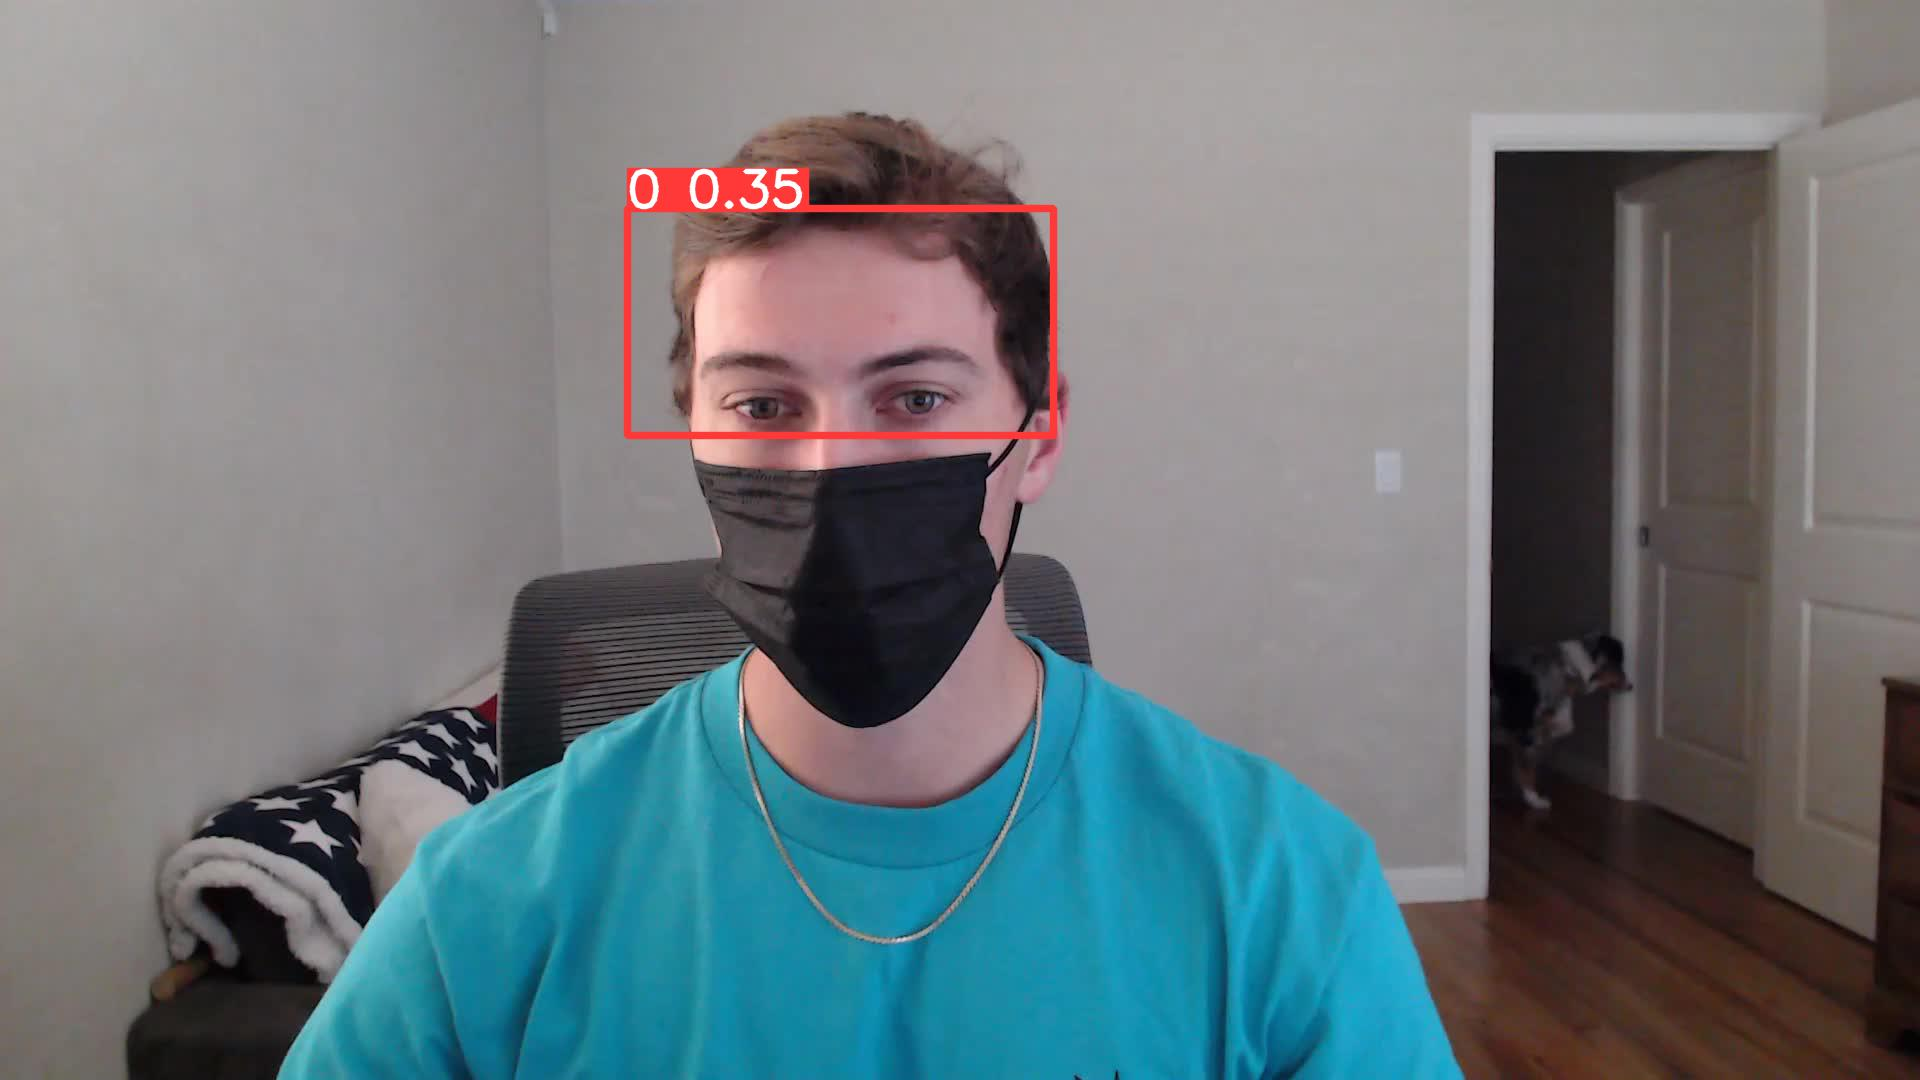

requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 v6.0-122-gd885799 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)




requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Fusing layers... 
Model Summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 
Saved 1 image to runs/detect/exp3


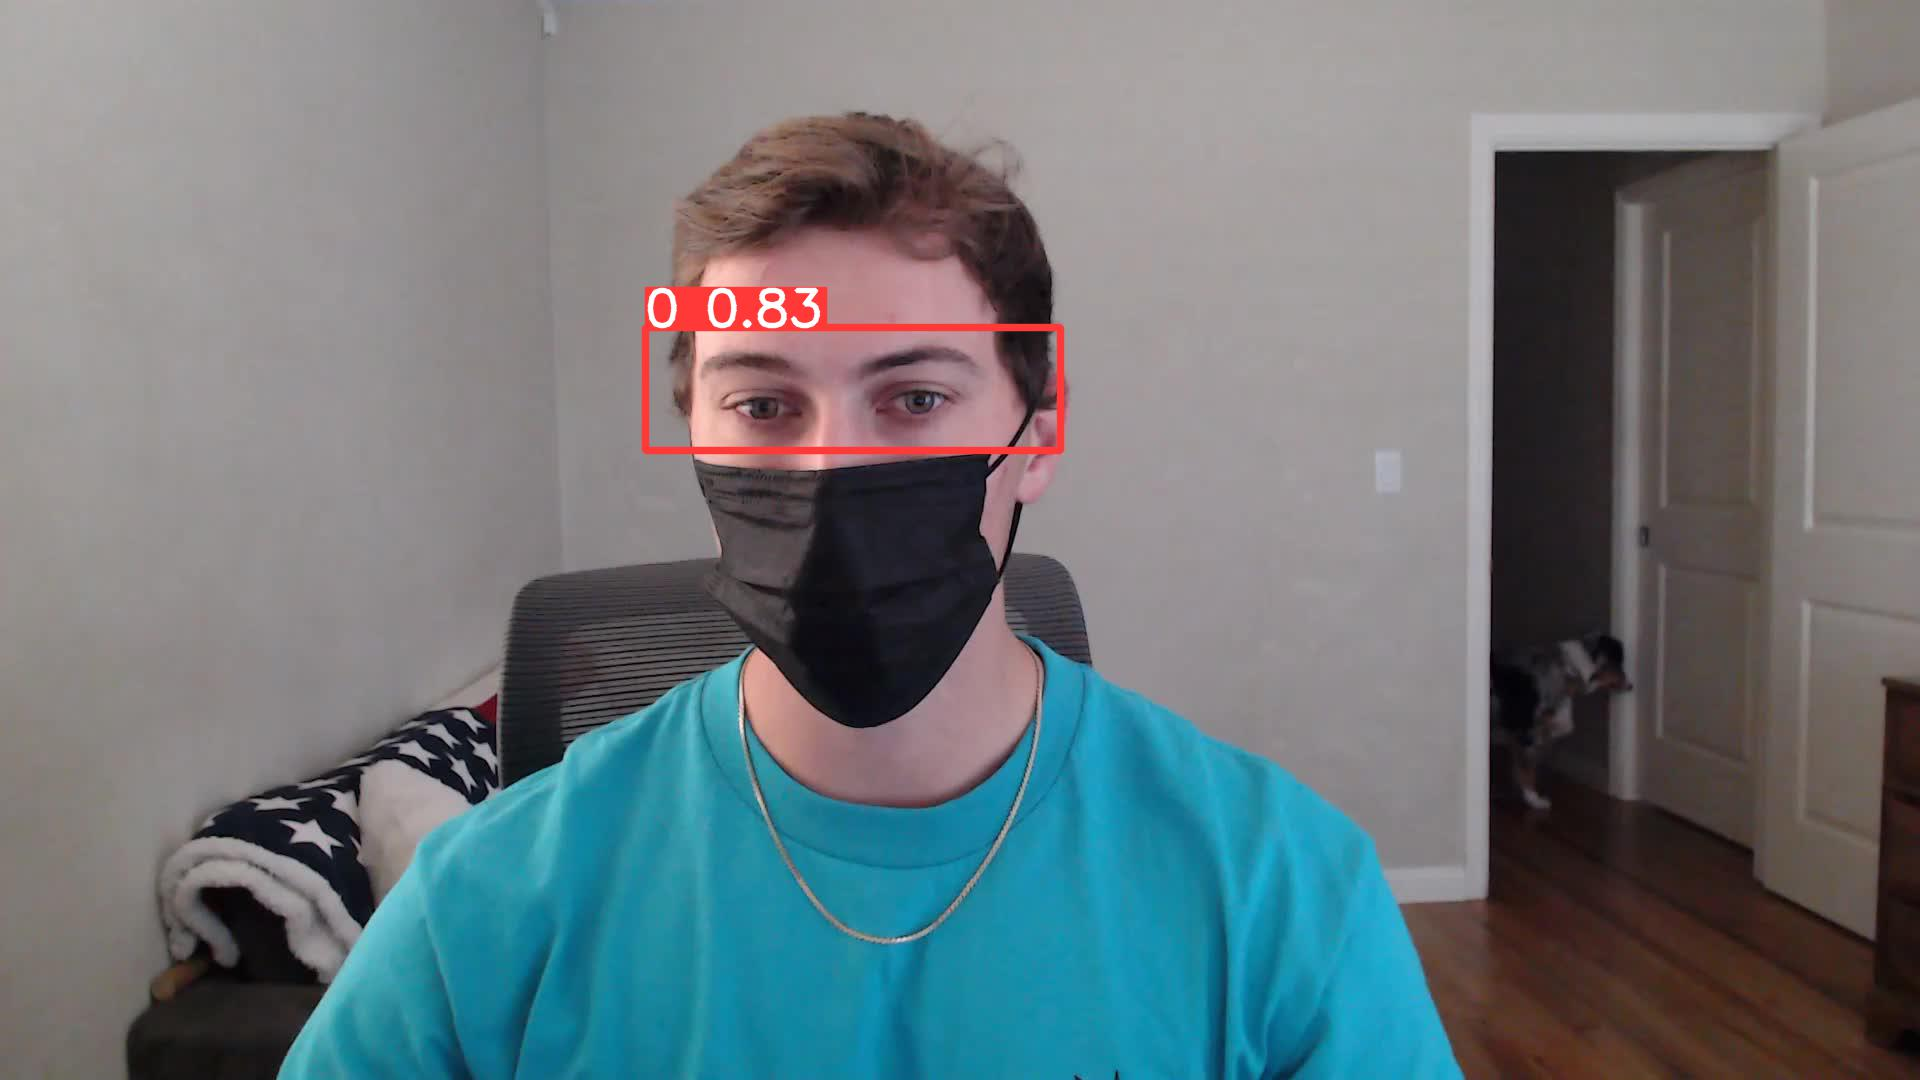

In [56]:
probability = float(0)
if(maskExists):
  probability = round((float(detectHalfFace() + detectEyeArea())/2) * 100, 2)

## If there's no mask

In [57]:
def detectWholeFace():
  wholeFaceWeightPath = "/content/drive/MyDrive/IdentityRecognitionDemov5/wholefaceweight.pt"
  trainedWholeFaceModel = torch.hub.load('/content/yolov5', 'custom', path=wholeFaceWeightPath, source='local')  # local repo
  wholeFaceResults = trainedWholeFaceModel(inputImagePath)
  wholeFaceResults.save()

  for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assume JPG file
    display(Image(filename=imageName))
    #print("\n")

  wholeFaceResultsJSON = json.loads(wholeFaceResults.pandas().xyxy[0].to_json(orient="records") )
  return float(wholeFaceResultsJSON[0]['confidence'])

In [58]:
if(not maskExists):
  !python detect.py --source {inputImagePath} --weights /content/drive/MyDrive/IdentityRecognitionDemov5/wholefaceweight.pt --img 416 --save-txt --save-conf
  
  labelPath = os.listdir("/content/yolov5/runs/detect/exp2/labels")
  labelPath = labelPath[0]


  with open("/content/yolov5/runs/detect/exp2/labels/" + labelPath) as f:
    lines = f.read()
    noMaskConfidenceRead = lines.split()
    noMaskConfidence = float(noMaskConfidenceRead[5])

  for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #assume JPG file
      display(Image(filename=imageName))
      #print("\n")
  
  probability = round(noMaskConfidence * 100, 2)

#Result

This has the probability of 58.73% of being the user


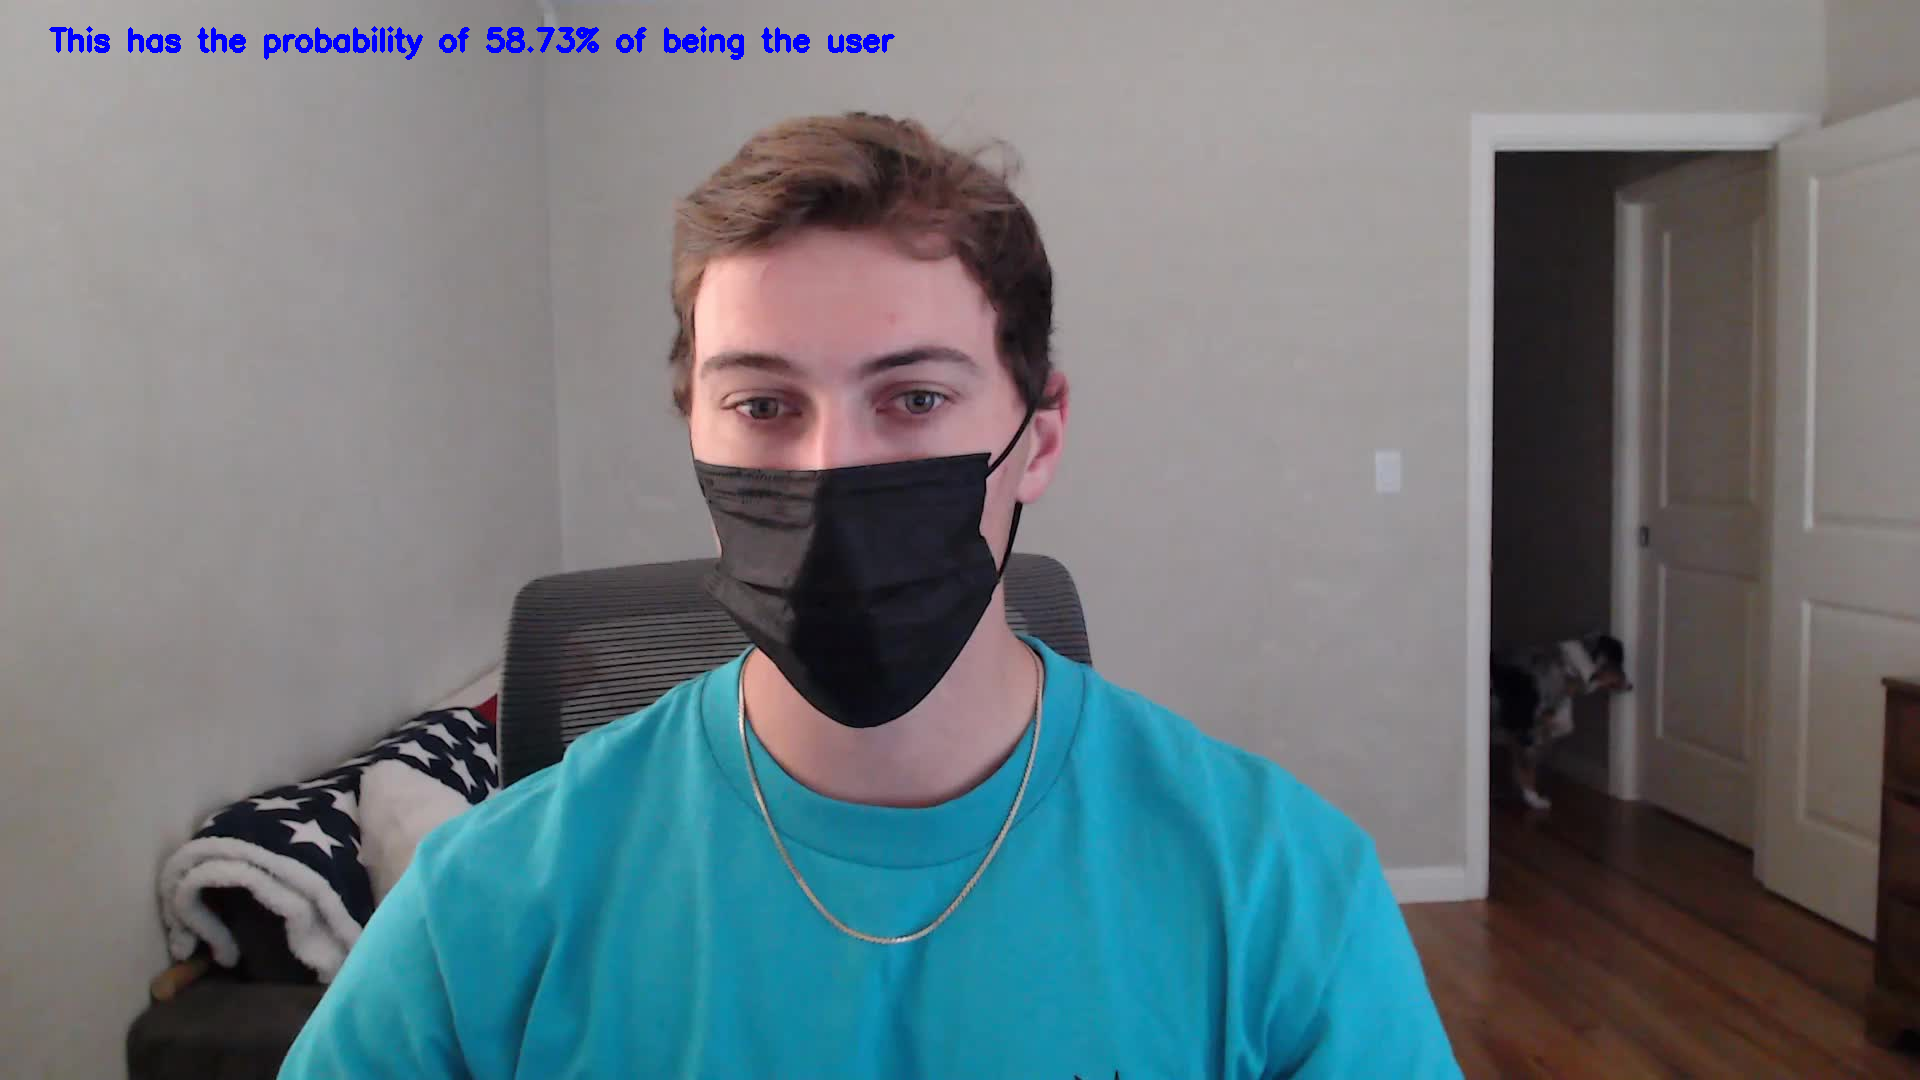

This has the probability of 58.73% of being the user


In [59]:
from google.colab.patches import cv2_imshow

print(f"This has the probability of {probability}% of being the user")
#display(Image(filename=InputImagePath))
image = cv2.imread(inputImagePath)
cv2.putText(image, f"This has the probability of {probability}% of being the user", org = (50,50), fontFace=cv2.FONT_HERSHEY_SIMPLEX , fontScale=1, color=(255, 0, 0),thickness=4)
cv2_imshow(image)
print(f"This has the probability of {probability}% of being the user")

# Reset Notebook:

In [60]:
#Uncomment out and run to reset
%cd ..
%rm -r yolov5

/content


In [61]:
%%shell
jupyter nbconvert --to html /content/HieuMask.ipynb

[NbConvertApp] Converting notebook /content/HieuMask.ipynb to html
[NbConvertApp] Writing 2295607 bytes to /content/HieuMask.html
